In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from importnb import Notebook

with Notebook():
  import MissingData

df = MissingData.df_complete

27
(27,)
          City PM2.5 [annual mean]  NO2 [annual mean]
0    Amsterdam           12.911907          35.942912
1       Athens           17.922383          35.192274
2       Berlin           14.068092          25.299571
3   Bratislava           17.256545          22.717695
4     Brussels           14.064969          37.300000
5    Bucharest           17.104333          26.722789
6     Budapest           17.951634          25.518454
7   Copenhagen           11.709037          29.143929
8       Dublin            7.797828          18.199688
9     Helsinki            7.646555          18.722280
10      Lisbon           11.893048          27.937959
11   Ljubljana             21.8977          20.295088
12  Luxembourg           11.661293          25.343004
13      Madrid           12.822748          39.200000
14     Nicosia           12.909975          24.466238
15       Paris           14.881603          39.700000
16      Prague             15.1996          28.507738
17        Riga     

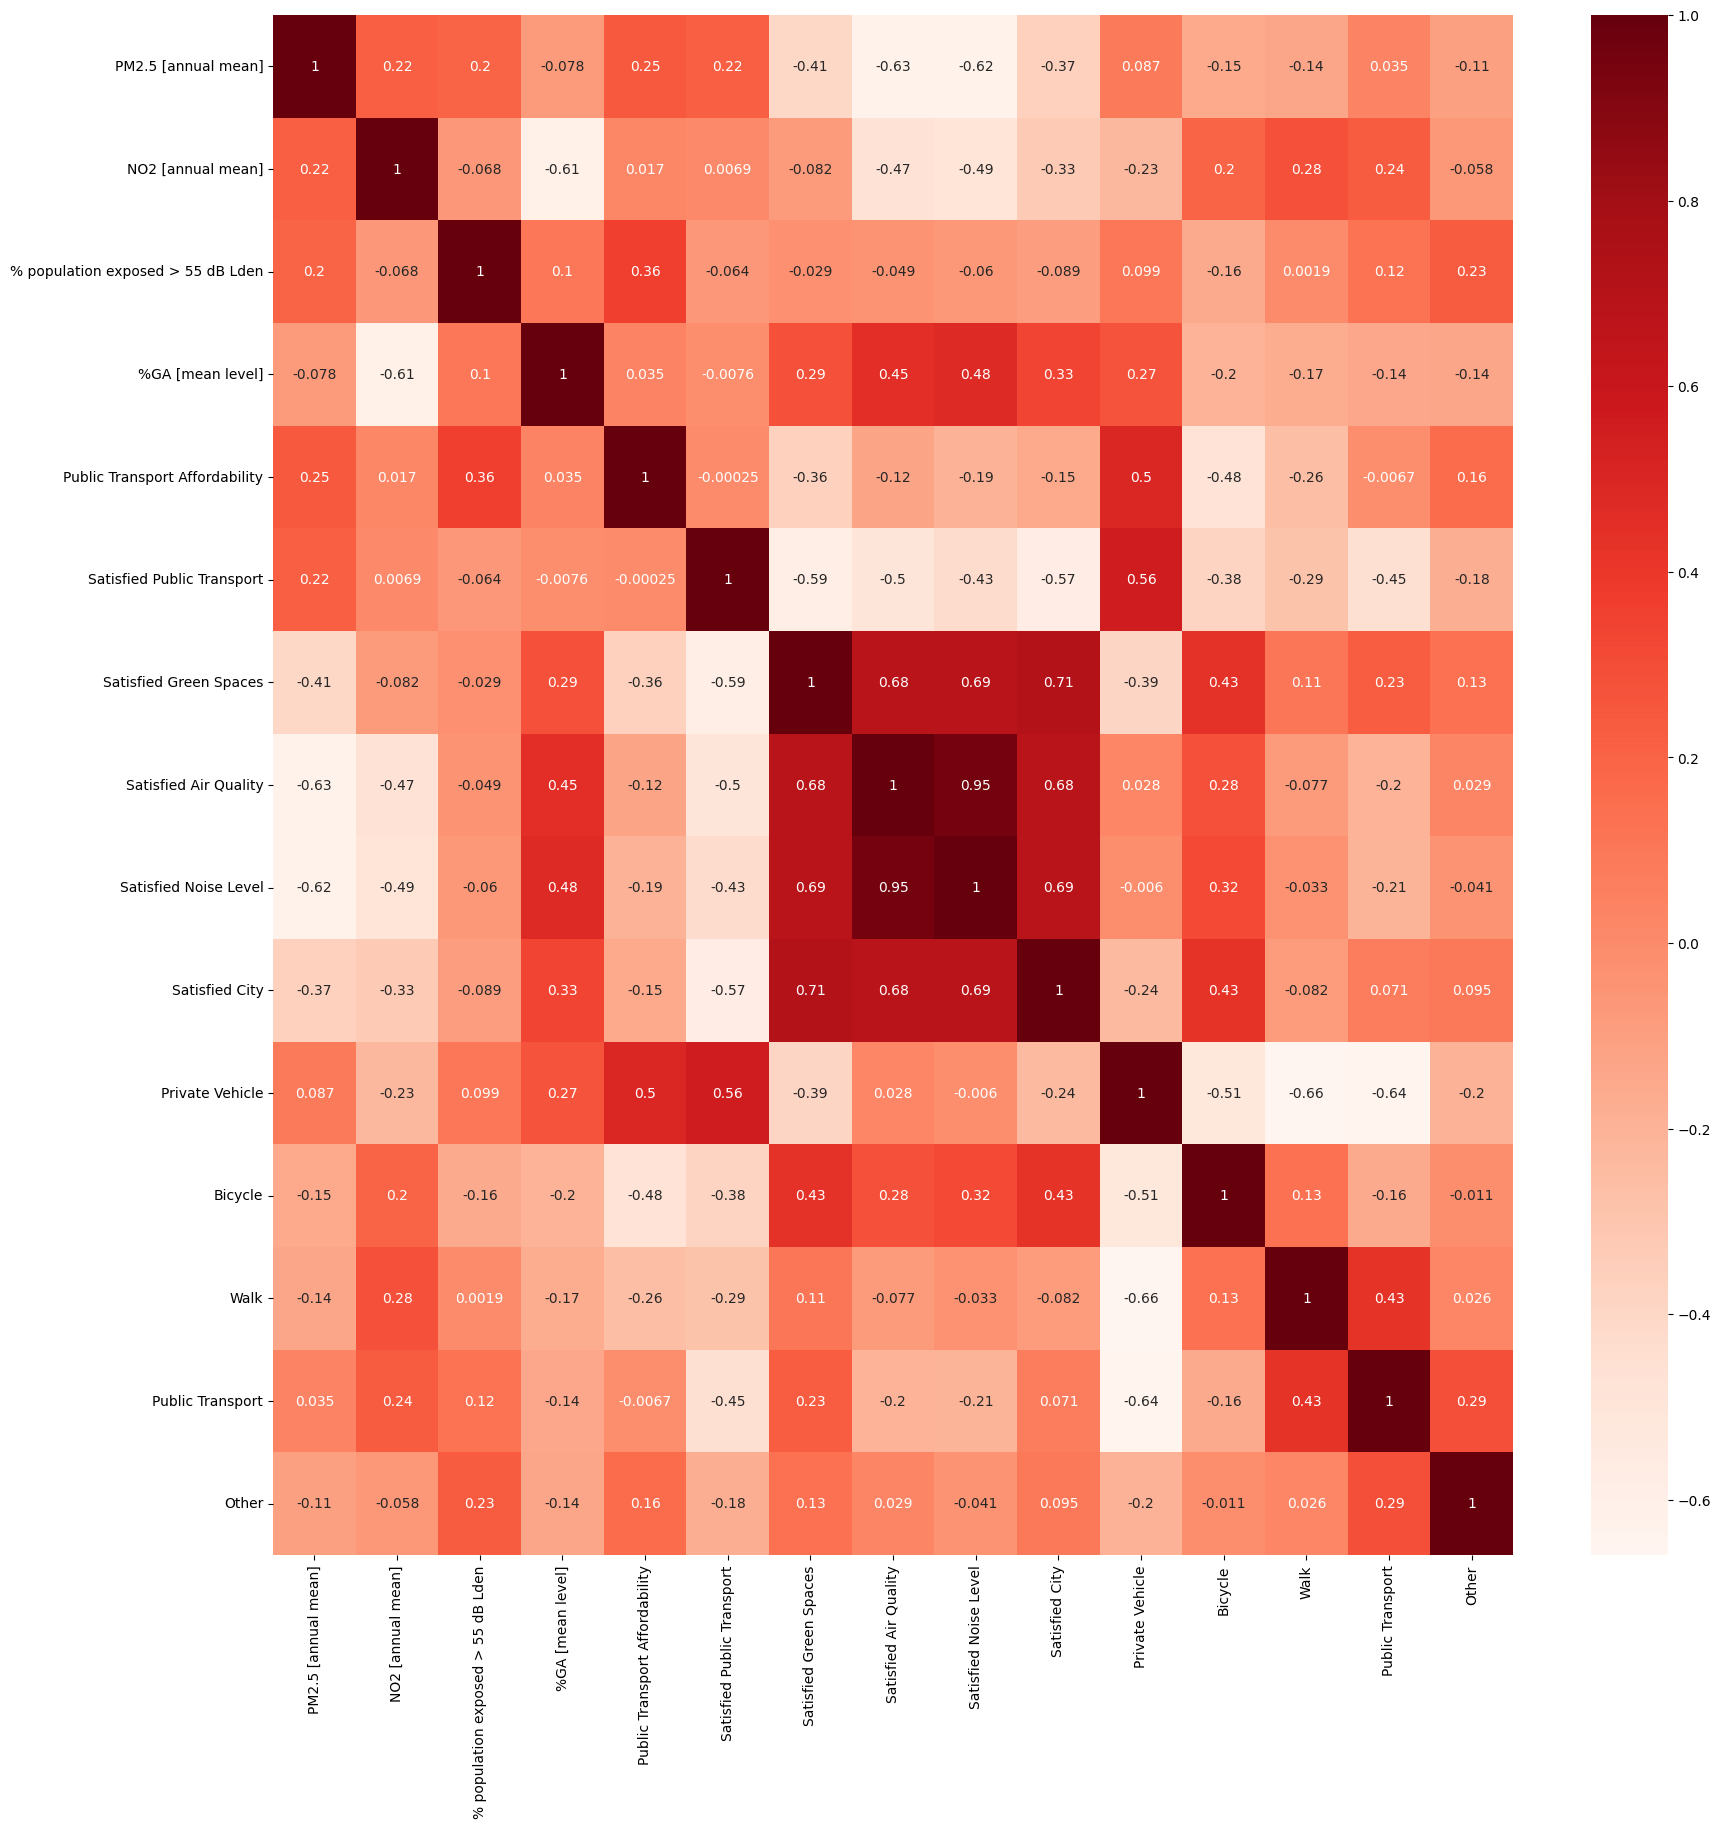

In [2]:
df_num = df.drop(columns=['City'])
figure(num=None, figsize=(20, 20), dpi=100, facecolor='w', edgecolor='k')
sns.heatmap(df_num.corr(), annot=True, cmap = 'Reds')
plt.show()

In [3]:
# Combine Distatisfied Air Quality and Disatisfied Noise Level

to_be_combined = df[['Satisfied Air Quality', 'Satisfied Noise Level']].copy()
print(to_be_combined)

pca = PCA(n_components=1)
pca1 = pca.fit_transform(to_be_combined)

print(pca1)

scaler = MinMaxScaler()
pca1_scaled = scaler.fit_transform(pca1)

df['Satisfied - Quiet and Clean'] = pca1_scaled
df = df.drop(columns=['Satisfied Air Quality','Satisfied Noise Level'])

print(df)


    Satisfied Air Quality  Satisfied Noise Level
0                0.619535               0.609211
1                0.117152               0.100259
2                0.745997               0.622528
3                0.449517               0.579264
4                0.460617               0.450841
5                0.000000               0.000000
6                0.380403               0.368807
7                0.653813               0.745321
8                0.907612               1.000000
9                1.000000               0.929076
10               0.530758               0.486220
11               0.688718               0.757035
12               0.860078               0.901169
13               0.277906               0.233851
14               0.742376               0.668347
15               0.089801               0.234331
16               0.589737               0.515861
17               0.694924               0.800492
18               0.163432               0.236063
19               0.2